# Why it's interesting to look at Quantum Kernels

$\blacktriangleright$ This is the **2nd** part of a notebook series demonstrating the functionality of the <code>QMLab</code> package.

[Part 1](./01_classical_kernel_methods.ipynb)  &nbsp;  &nbsp; 
[Part 3](./training_quantum_kernels.ipynb)

Quantum Kernels are functions of the form
$$
\kappa(\mathbf{x}, \mathbf{x}') = \left| \Braket{\psi(\mathbf{x}')| \psi(\mathbf{x}) }\right|^2,
$$
where one uses $\mathbf{x} \longrightarrow \Ket{\psi(\mathbf{x})}$ an embedding that maps feature vectors to a higher dimensional 
hilbert space $\mathcal{H}$.

In [ ]:
from qmlab.data_generation import generate_random_data
from qmlab.plotting import plot_2d_data_with_train_test_split, plot_decision_boundaries
from qmlab.kernel import FidelityIQPKernel
from sklearn import metrics

# fix seed for reproducability
random_state = 12345

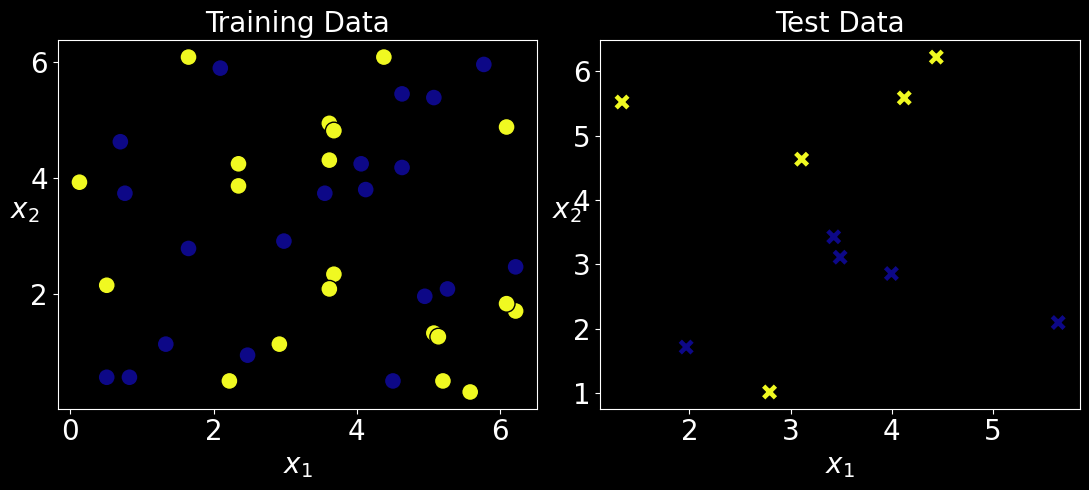

In [10]:
X_train, y_train, X_test, y_test = generate_random_data(
    feature_dimension=2,
    training_examples_per_class=20,
    test_examples_per_class=5,
    delta=0.3,
    random_state=random_state,
) # this creates uniformly sampled feature vectors [0, 2pi]^2 with corresponding labels in [-1, +1]

plot_2d_data_with_train_test_split(X_train, y_train, X_test, y_test, separate_plots=True)

In [11]:
from sklearn.svm import SVC

svm = SVC(kernel="rbf", random_state=random_state)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.5

$$ {\tt{accuracy}}(\mathbf{\hat{y}}, \mathbf{y}) = \frac{1}{m} \sum_{i=1}^m \delta_{\hat{y}_i\,y_i} \qquad 
\mathbf{\hat{y}}, \mathbf{y} \in \mathbb{R}^m.$$

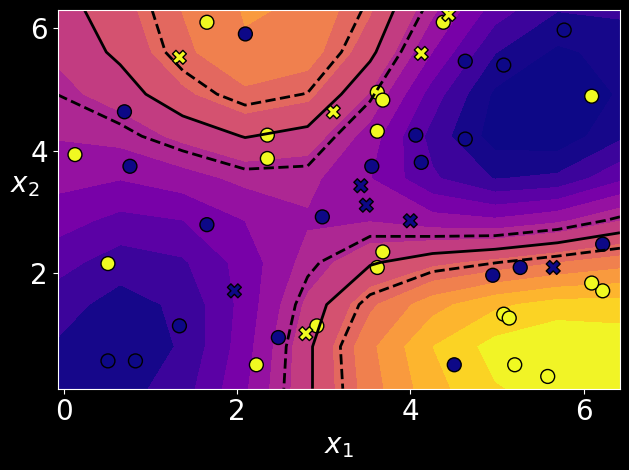

In [12]:
plot_decision_boundaries(svm, X_train, y_train, X_test, y_test)

In [ ]:
qsvm = IQPKernelClassifier(jit=True)
qsvm.fit(X_train, y_train)

y_pred = qsvm.predict(X_test)
metrics.accuracy_score(y_test, y_pred) 

0.7

In [14]:
X_train, y_train, X_test, y_test = generate_random_data(
    feature_dimension=4,
    training_examples_per_class=20,
    test_examples_per_class=5,
    delta=0.3,
    random_state=random_state,
)
X_train.shape

(40, 4)

In [15]:
svm = SVC(kernel="rbf", random_state=random_state)
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.4

In [16]:
qsvm.fit(X_train, y_train)
qsvm.score(X_test, y_test)

0.5